In [43]:
import DataLoader as loader
import hddm
import HDDMmodelMaker as ddm
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
dl = loader.DataLoader()
exp, users = dl.loadSessionsData()

In [3]:
#Load by HDDM package
data = hddm.load_csv('./output/experimentData.csv')
data = hddm.utils.flip_errors(data)
data.head()

,Unnamed: 0,round,response,rt,user,session,subj_id
0,0,1,1,6.332,usuario3,s3t1330,usuario3s3t1330
1,1,2,1,12.817,usuario3,s3t1330,usuario3s3t1330
2,2,3,1,6.144,usuario3,s3t1330,usuario3s3t1330
3,3,4,0,-4.218,usuario3,s3t1330,usuario3s3t1330
4,4,5,0,-5.595,usuario3,s3t1330,usuario3s3t1330


In [4]:
data["session"].unique()

array(['s3t1330', 's1t1030', 's4t1500', 's2t1200'], dtype=object)

In [5]:
#data segmented by treatment 

sess1 = data.loc[data.session == 's1t1030']
sess2 = data.loc[data.session == 's2t1200']
sess3 = data.loc[data.session == 's3t1330']
sess4 = data.loc[data.session == 's4t1500']


In [125]:
sess1["round"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [18]:
userData = pd.read_csv("./output/userINformation.csv")
userData.head()

,Unnamed: 0,age,gender,session,subj_id,user
0,0,66.0,female,s3t1330,usuario2s3t1330,usuario2
1,1,40.0,male,s3t1330,usuario13s3t1330,usuario13
2,2,54.0,male,s3t1330,usuario11s3t1330,usuario11
3,3,13.0,female,s3t1330,usuario8s3t1330,usuario8
4,4,26.0,male,s3t1330,usuario19s3t1330,usuario19


In [17]:
userData.session.value_counts()

s2t1200    36
s1t1030    36
s4t1500    36
s3t1330    22
Name: session, dtype: int64

In [24]:
userData.groupby(["session", "gender"]).subj_id.count()

session  gender
s1t1030  female    21
         male      15
s2t1200  female    19
         male      16
s3t1330  female    13
         male       9
s4t1500  female    18
         male      18
Name: subj_id, dtype: int64

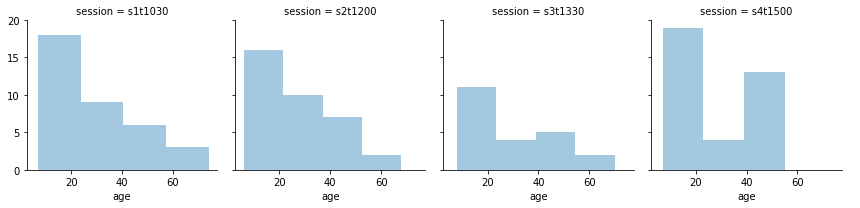

In [63]:
userData = userData.sort_values(by = "session")
g = sns.FacetGrid(userData, col="session", height = 3)
g.map(sns.distplot, "age", kde=False)
g.add_legend()

In [43]:
modeler = ddm.HDDMmodelMaker()
rounds1 = pd.DataFrame()
rounds2 = pd.DataFrame()
rounds3 = pd.DataFrame()
rounds4 = pd.DataFrame()

#Five by five rounds
st=time.time()
rounds = range(1,50)

for r in rounds:
    print("Model: 1, round %d, time: %f" % (r, time.time() - st))
    m_1 = modeler.fit_model(sess1.loc[(sess1["round"] >= r) & (sess1["round"] <= (r+5))], 5000, 200)
    print("Model: 2, round %d, time: %f" % (r, time.time() - st))
    m_2 = modeler.fit_model(sess2.loc[(sess2["round"] >= r) & (sess2["round"] <= (r+5))], 5000, 200)
    print("Model: 3, round %d, time: %f" % (r, time.time() - st))
    m_3 = modeler.fit_model(sess3.loc[(sess3["round"] >= r) & (sess3["round"] <= (r+5))], 5000, 200)
    print("Model: 4, round %d, time: %f" % (r, time.time() - st))
    m_4 = modeler.fit_model(sess4.loc[(sess4["round"] >= r) & (sess4["round"] <= (r+5))], 5000, 200)

    df_1 = modeler.get_stats(m_1)
    df_2 = modeler.get_stats(m_2)
    df_3 = modeler.get_stats(m_3)
    df_4 = modeler.get_stats(m_4)
    df_1["round"] = r
    df_2["round"] = r
    df_3["round"] = r
    df_4["round"] = r
    if r == 0:
        rounds1 = df_1
        rounds2 = df_2
        rounds3 = df_3
        rounds4 = df_4
    else:
        rounds1 = rounds1.append(df_1, ignore_index=True)
        rounds2 = rounds2.append(df_2, ignore_index=True)
        rounds3 = rounds3.append(df_3, ignore_index=True)
        rounds4 = rounds4.append(df_4, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        rounds1.to_csv("./output/rounds/sess1.csv")
        rounds2.to_csv("./output/rounds/sess2.csv")
        rounds3.to_csv("./output/rounds/sess3.csv")
        rounds4.to_csv("./output/rounds/sess4.csv")
rounds1.to_csv("./output/rounds/sess1.csv")
rounds2.to_csv("./output/rounds/sess2.csv")
rounds3.to_csv("./output/rounds/sess3.csv")
rounds4.to_csv("./output/rounds/sess4.csv")

Model: 1, round 1, time: 0.000721
 [-----------------100%-----------------] 5000 of 5000 complete in 12.6 secModel: 2, round 1, time: 12.639309
 [-----------------100%-----------------] 5000 of 5000 complete in 12.6 secModel: 3, round 1, time: 25.307999
 [-----------------100%-----------------] 5000 of 5000 complete in 12.0 secModel: 4, round 1, time: 37.351477
 [-----------------100%-----------------] 5000 of 5000 complete in 13.1 secModel: 1, round 2, time: 50.915622
 [-----------------100%-----------------] 5000 of 5000 complete in 11.8 secModel: 2, round 2, time: 62.852960
 [-----------------100%-----------------] 5000 of 5000 complete in 12.6 secModel: 3, round 2, time: 75.515120
 [-----------------100%-----------------] 5000 of 5000 complete in 11.7 secModel: 4, round 2, time: 87.259709
 [-----------------100%-----------------] 5000 of 5000 complete in 13.2 secRounds: 2
Model: 1, round 3, time: 100.943647
 [-----------------100%-----------------] 5000 of 5000 complete in 12.3 sec

 [-----------------100%-----------------] 5000 of 5000 complete in 7.3 secModel: 2, round 37, time: 1571.551256
 [-----------------100%-----------------] 5000 of 5000 complete in 10.1 secModel: 3, round 37, time: 1581.751534
 [-----------------100%-----------------] 5000 of 5000 complete in 9.2 secModel: 4, round 37, time: 1591.030907
 [-----------------100%-----------------] 5000 of 5000 complete in 12.5 secModel: 1, round 38, time: 1604.432879
 [-----------------100%-----------------] 5000 of 5000 complete in 8.0 secModel: 2, round 38, time: 1612.507610
 [-----------------100%-----------------] 5000 of 5000 complete in 11.5 secModel: 3, round 38, time: 1624.037986
 [-----------------100%-----------------] 5000 of 5000 complete in 8.4 secModel: 4, round 38, time: 1632.527274
 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 secRounds: 38
Model: 1, round 39, time: 1642.375805
 [-----------------100%-----------------] 5000 of 5000 complete in 8.3 secModel: 2, round 

In [10]:
def plot_rounds(groups, param, title, normalize = False):
    plt.figure(figsize = (10,10))
    for g in groups:
        data = pd.read_csv("./output/rounds/sess%s.csv" % (g))
        param_df = data.loc[(data.parameter == param), ["mean", "round"]]
        if normalize:
            if param == "v":
                param_df["mean"] = param_df["mean"].abs()
        plt.plot(param_df["round"],param_df["mean"], "-o", label = g)
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

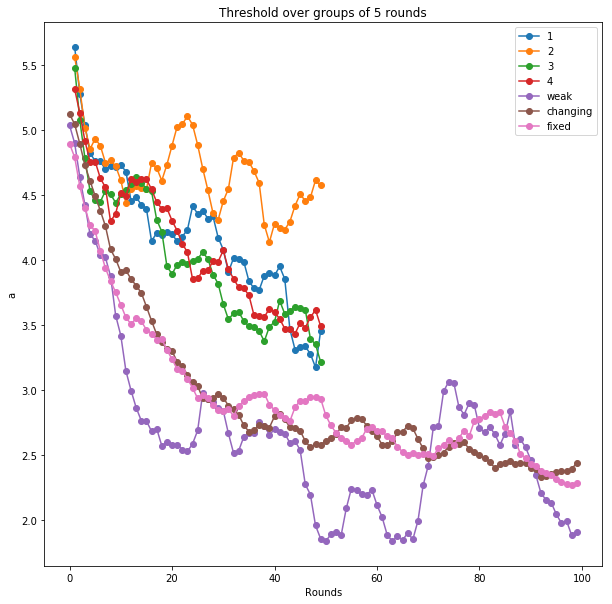

In [65]:
plot_rounds(["1", "2", "3", "4", "weak", "changing", "fixed"], "a", "Threshold over groups of 5 rounds")

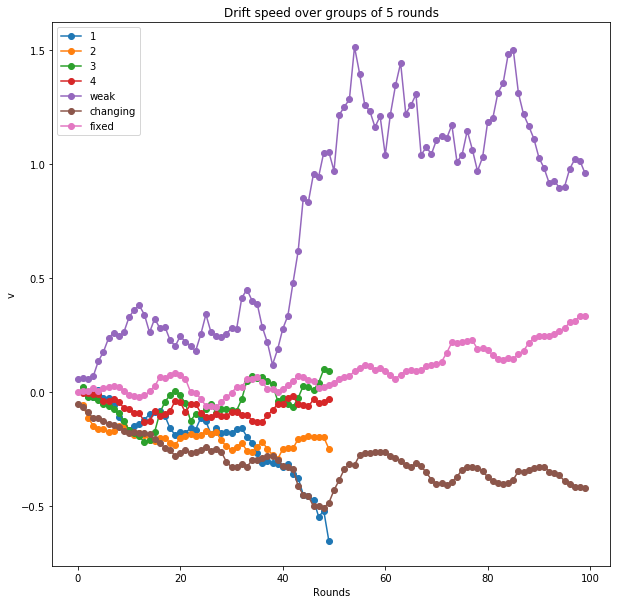

In [66]:
plot_rounds(["1", "2", "3", "4", "weak", "changing", "fixed"], "v", "Drift speed over groups of 5 rounds")

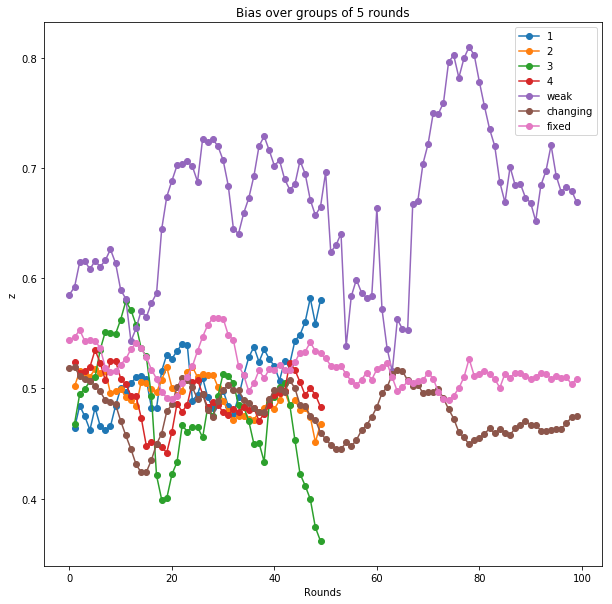

In [67]:
plot_rounds(["1", "2", "3", "4", "weak", "changing", "fixed"], "z", "Bias over groups of 5 rounds")

## Action analysis

In [68]:
data.head()

,Unnamed: 0,round,response,rt,user,session,subj_id
0,0,1,1,6.332,usuario3,s3t1330,usuario3s3t1330
1,1,2,1,12.817,usuario3,s3t1330,usuario3s3t1330
2,2,3,1,6.144,usuario3,s3t1330,usuario3s3t1330
3,3,4,0,-4.218,usuario3,s3t1330,usuario3s3t1330
4,4,5,0,-5.595,usuario3,s3t1330,usuario3s3t1330


In [99]:
#getting opponent actions

sessions = data.session.unique()
data["actions"] = ""
data["response_opp"] = ""
for s in sessions:
    users = data.loc[data.session == s].user.unique()
    for u in users:
        with open("../data/%s/data/%s" % (s, u)) as f:
            for opponent in f:
                print("%s %s %s" % (s, u, opponent.strip()))
                for r in data.loc[data.session == s, "round"].unique():
                    action1 = ""
                    if r == 1: action1 = "--"
                    else:
                        action1 = "%s%s" % (data.loc[(data["round"] == r-1) & (data["user"] == u) & (data["session"] == s), "response"].item(),
                                            data.loc[(data["round"] == r-1) & (data["user"] == opponent.strip()) & (data["session"] == s), "response"].item())
                    data.loc[(data["round"] == r) & (data["user"] == u) & (data["session"] == s), ['actions']] = "%s%s" % (action1, data.loc[(data["round"] == r) & (data["user"] == u) & (data["session"] == s), "response"].item())
                    data.loc[(data["round"] == r) & (data["user"] == u) & (data["session"] == s), ['response_opp']] = data.loc[(data["round"] == r) & (data["user"] == opponent.strip()) & (data["session"] == s), "response"].item()
data.head()

s3t1330 usuario3 usuario8
s3t1330 usuario12 usuario1
s3t1330 usuario10 usuario22
s3t1330 usuario1 usuario12
s3t1330 usuario22 usuario10
s3t1330 usuario14 usuario16
s3t1330 usuario5 usuario15
s3t1330 usuario9 usuario2
s3t1330 usuario18 usuario19
s3t1330 usuario20 usuario21
s3t1330 usuario7 usuario13
s3t1330 usuario16 usuario14
s3t1330 usuario13 usuario7
s3t1330 usuario2 usuario9
s3t1330 usuario11 usuario6
s3t1330 usuario4 usuario17
s3t1330 usuario15 usuario5
s3t1330 usuario19 usuario18
s3t1330 usuario8 usuario3
s3t1330 usuario17 usuario4
s3t1330 usuario6 usuario11
s3t1330 usuario21 usuario20
s1t1030 usuario3 usuario25
s1t1030 usuario12 usuario31
s1t1030 usuario28 usuario2
s1t1030 usuario36 usuario13
s1t1030 usuario24 usuario17
s1t1030 usuario10 usuario16
s1t1030 usuario1 usuario7
s1t1030 usuario26 usuario5
s1t1030 usuario34 usuario29
s1t1030 usuario30 usuario11
s1t1030 usuario22 usuario8
s1t1030 usuario14 usuario27
s1t1030 usuario5 usuario26
s1t1030 usuario9 usuario21
s1t1030 usuario18 

,Unnamed: 0,round,response,rt,user,session,subj_id,actions,response_opp
0,0,1,1,6.332,usuario3,s3t1330,usuario3s3t1330,--1,1
1,1,2,1,12.817,usuario3,s3t1330,usuario3s3t1330,111,1
2,2,3,1,6.144,usuario3,s3t1330,usuario3s3t1330,111,0
3,3,4,0,-4.218,usuario3,s3t1330,usuario3s3t1330,100,0
4,4,5,0,-5.595,usuario3,s3t1330,usuario3s3t1330,000,1


In [103]:
data.loc[(data["round"] <= 15) & (data["user"] == "usuario11") & (data["session"] == "s4t1500")]

,Unnamed: 0,round,response,rt,user,session,subj_id,actions,response_opp
4114,0,1,0,-15.401,usuario11,s4t1500,usuario11s4t1500,--0,0
4115,1,2,0,-6.454,usuario11,s4t1500,usuario11s4t1500,000,0
4116,2,3,1,4.747,usuario11,s4t1500,usuario11s4t1500,001,0
4117,3,4,0,-22.575,usuario11,s4t1500,usuario11s4t1500,100,1
4118,4,5,0,-29.403,usuario11,s4t1500,usuario11s4t1500,010,0
4119,5,6,0,-20.365,usuario11,s4t1500,usuario11s4t1500,000,1
4120,6,7,0,-23.764,usuario11,s4t1500,usuario11s4t1500,010,1
4121,7,8,0,-28.697,usuario11,s4t1500,usuario11s4t1500,010,1
4122,8,9,0,-5.187,usuario11,s4t1500,usuario11s4t1500,010,0
4123,9,10,0,-29.011,usuario11,s4t1500,usuario11s4t1500,000,0


In [102]:
data.loc[(data["round"] <= 15) & (data["user"] == "usuario25") & (data["session"] == "s4t1500")]

,Unnamed: 0,round,response,rt,user,session,subj_id,actions,response_opp
3864,0,1,0,-9.833,usuario25,s4t1500,usuario25s4t1500,--0,0
3865,1,2,0,-5.658,usuario25,s4t1500,usuario25s4t1500,000,0
3866,2,3,0,-3.100,usuario25,s4t1500,usuario25s4t1500,000,1
3867,3,4,1,12.649,usuario25,s4t1500,usuario25s4t1500,011,0
3868,4,5,0,-4.074,usuario25,s4t1500,usuario25s4t1500,100,0
3869,5,6,1,5.215,usuario25,s4t1500,usuario25s4t1500,001,0
3870,6,7,1,9.807,usuario25,s4t1500,usuario25s4t1500,101,0
3871,7,8,1,8.986,usuario25,s4t1500,usuario25s4t1500,101,0
3872,8,9,0,-16.396,usuario25,s4t1500,usuario25s4t1500,100,0
3873,9,10,0,-5.941,usuario25,s4t1500,usuario25s4t1500,000,0


In [104]:
#Initial actions
defInitial = data.loc[data.actions == "--0"]
cooInitial = data.loc[data.actions == "--1"]

print("Defectors: %d, Cooperators %d" % (len(defInitial.index), len(cooInitial.index)))


Defectors: 54, Cooperators 70


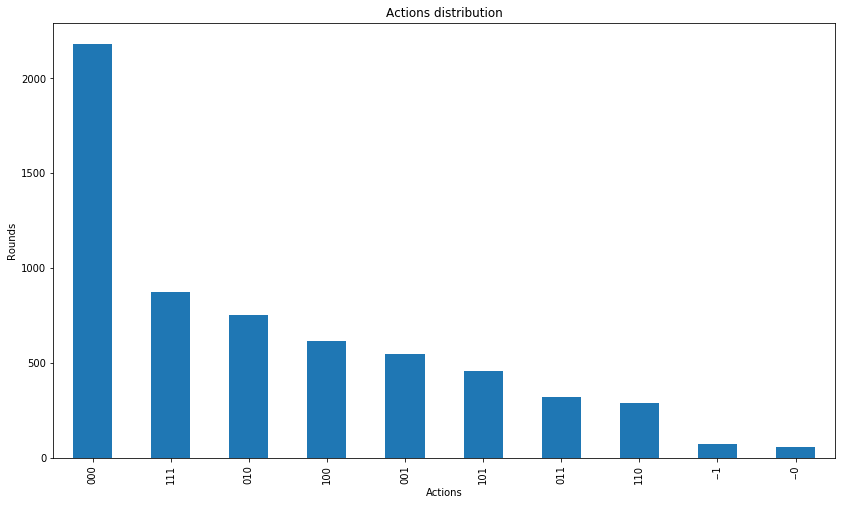

In [105]:

data['actions'].value_counts().plot(kind = "bar", figsize =(14, 8), title = "Actions distribution")
plt.xlabel("Actions")
plt.ylabel("Rounds")
plt.show()

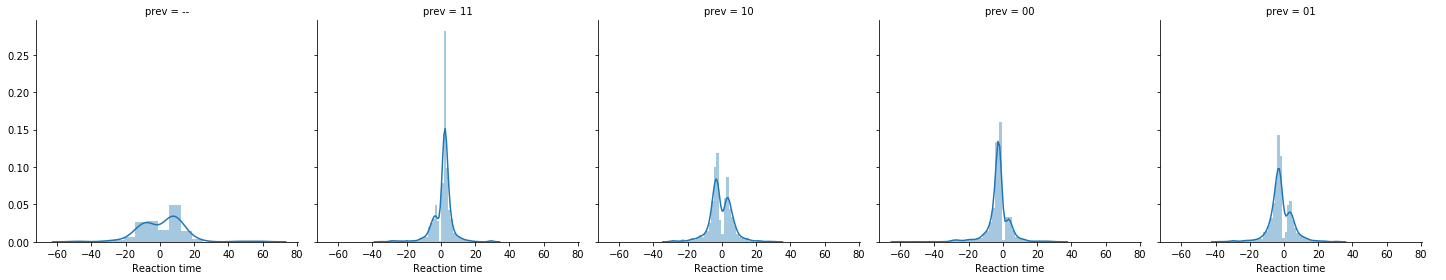

In [126]:
conData = data
conData["prev"] = conData.actions.str[:2]
g = sns.FacetGrid(conData, col="prev", height = 4)
g.map(sns.distplot, "rt")
g.add_legend()
g.set(xlabel = "Reaction time")

[Text(0,0.5,'Previous actions'),
 Text(0.5,0,'Row count'),
 Text(0.5,1,'Actions after given context')]

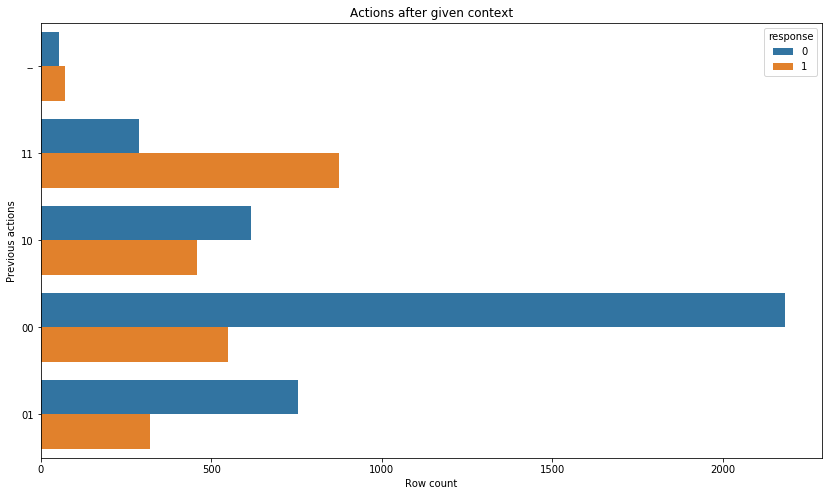

In [127]:
plt.figure(figsize = (14,8))
ax = sns.countplot(y="prev", hue="response", data=conData)
ax.set(xlabel='Row count', ylabel='Previous actions', title = "Actions after given context")

In [108]:
def actionChange(actions1, actions2, user1):
    if len(actions1) != len(actions2): return "Lenghts mismatch" #Raise exception
    rounds = len(actions1)
    prev1 = ""
    prev2 = ""
    switch_events = pd.DataFrame(columns=["type", "lag", "subject", "round"])
    lag = 0
    for r in range(0, rounds):
        if r ==0:
            prev1 = actions1[r]
            prev2 = actions2[r]
            lag += 1
            continue
        elif actions1[r] != prev1:
            switch_events = switch_events.append(
                {"context": prev2, "type": "%s%s" % (prev1, actions1[r]),
                 "lag": lag, "subject": user1, "round": r + 1}, ignore_index=True)
            lag = 0
        if actions2[r] == prev2:
            lag += 1
        else: lag = 1
        prev1 = actions1[r]
        prev2 = actions2[r]
    return switch_events

In [109]:
def actionCounts(actions, user):
    act_df = {'user':user,'--0':0,'--1':0,'010':0,'101':0,'111':0,'100':0,'110':0,'001':0,'011':0,'000':0}
    for a in actions:
        act_df[a] = act_df[a] + 1
    return act_df

In [111]:
switches = pd.DataFrame()
actions = pd.DataFrame()
users = data.subj_id.unique()
for u in users:
    df = data.loc[data.subj_id == u]
    df = df.sort_values(by = "round", ascending = True)
    acc1 = df.response.values
    acc2 = df.response_opp.values
    switches = switches.append(actionChange(acc1, acc2, u))
    actions = actions.append(actionCounts(df.actions, u), ignore_index=True)
switches

/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,context,lag,round,subject,type
0,0.0,1,4,usuario3s3t1330,10
1,0.0,1,8,usuario3s3t1330,01
2,1.0,1,9,usuario3s3t1330,10
3,1.0,1,11,usuario3s3t1330,01
4,0.0,1,12,usuario3s3t1330,10
5,0.0,1,16,usuario3s3t1330,01
6,0.0,2,18,usuario3s3t1330,10
7,1.0,1,20,usuario3s3t1330,01
8,1.0,1,21,usuario3s3t1330,10
9,1.0,1,24,usuario3s3t1330,01


In [114]:
print(switches.loc[(switches.context == 0) & (switches.type == "10")].lag.value_counts())
print(switches.loc[(switches.context == 1) & (switches.type == "01")].lag.value_counts())

1    445
2    113
3     47
4      6
6      2
9      1
7      1
Name: lag, dtype: int64
1     262
2      48
3       8
10      1
7       1
Name: lag, dtype: int64


In [118]:
print(switches.loc[(switches.context == 1) & (switches.type == "10")].lag.value_counts())
print(switches.loc[(switches.context == 0) & (switches.type == "01")].lag.value_counts())

1    204
2     59
3     12
4      9
5      3
6      1
Name: lag, dtype: int64
1     292
2     126
3      58
5      23
4      19
6      10
8       6
9       5
7       3
10      2
19      1
18      1
16      1
14      1
11      1
Name: lag, dtype: int64


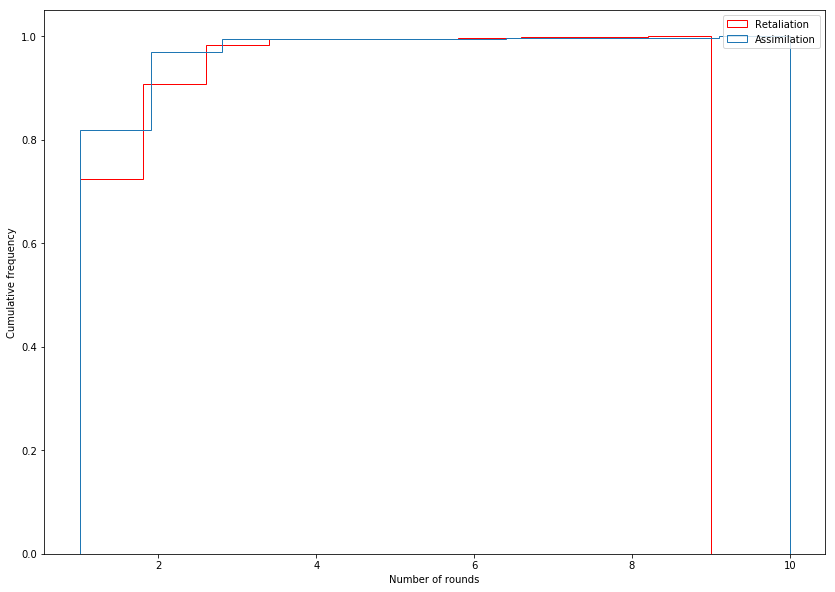

In [119]:
plt.figure(figsize = (14,10))
switches.loc[(switches.context == 0) & (switches.type == "10")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches.loc[(switches.context == 1) & (switches.type == "01")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.show()

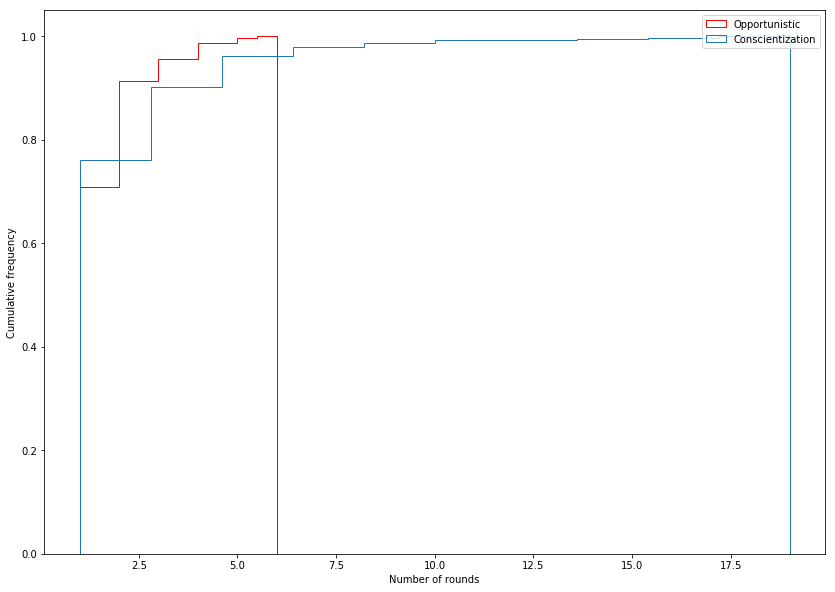

In [120]:
plt.figure(figsize = (14,10))
switches.loc[(switches.context == 1) & (switches.type == "10")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Opportunistic")

switches.loc[(switches.context == 0) & (switches.type == "01")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Conscientization"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.show()